In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("diabetes.csv")

데이터 확인
head(), tail(), isnull()
columns, describe()

In [ ]:
# Data Dictionary
# Pregnancies - Number of times pregnant 임신횟수
# Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test 포도당수치
# BloodPressure - Diastolic blood pressure - 혈압
# SkinThickness - Triceps skin fold thickness (mm) - 피부두께
# Insulin - 2-Hour serum insulin (mu U/ml) - 인슐린 수치 인슐린이 분비되지 않으면 소화가 안되므로 당수치 높아짐 당뇨의미
# BMI - Body mass index (weight in kg/(height in m)^2) 
# DiabetesPedigreeFunction - Diabetes pedigree function
# Age - Age (years) - 나이

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.shape

(768, 9)

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
Insulindf = df[ (df["Insulin"] <= 10) & (df["Outcome"] == 1)] #인슐린이 적게 분비되면서 당뇨병인사람
Insulindf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
15,7,100,0,0,0,30.0,0.484,32,1
...,...,...,...,...,...,...,...,...,...
754,8,154,78,32,0,32.4,0.443,45,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


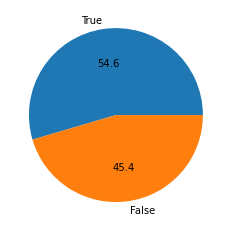

In [3]:
data = [(df["Pregnancies"] >2 ).value_counts(normalize=True)[True], (df["Pregnancies"]>2).value_counts(normalize=True)[False]]
data
categories=["True", "False"]
plt.pie(data, labels=categories, autopct='%0.1f')
plt.show()

Try- except 구문

try - 에러가 발생하지 않았을때 실행되는 구문

except - 에러가 발생했을때 실행되는 구문 (Exception 넣을수 있고 넣지 않을수 있다)
넣지 않으면 모든 exception에서 수행, 특정 Ex 넣으면 특정 Ex에서만 수행

else - 에러가 발생하지 않았을때 try절과 함께 실행되는 구문

finally - 에러가 발생하든 하지 않든 실행되는 구문

In [24]:
def piechart(df_name, feature, number):
    try:
        data = [(df_name[feature] > number ).value_counts(normalize=True)[True], (df_name[feature]>number).value_counts(normalize=True)[False]]
        data
        categories=["True", "False"]
        plt.pie(data, labels=categories, autopct='%0.1f')
        plt.show()
    except KeyError as ke:
        print(f"KeyError occured: {feature} is not feature of this dataset")
    else:
        print("else statement")
    finally:
        print("finally statement")

In [ ]:
# def piechart(df_name):
#     try:
#         data = [(df_name > number ).value_counts(normalize=True)[True], (df_name >number).value_counts(normalize=True)[False]]
#         data
#         categories=["True", "False"]
#         plt.pie(data, labels=categories, autopct='%0.1f')
#         plt.show()
#     except KeyError as ke:
#         print(f"KeyError occured: {feature} is not feature of this dataset")
#     else:
#         print("else statement")
#     finally:
#         print("finally statement")

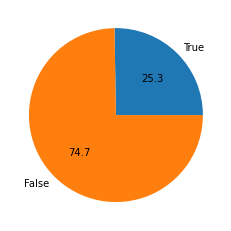

else statement
finally statement


In [25]:
piechart(df, "Age", 40)

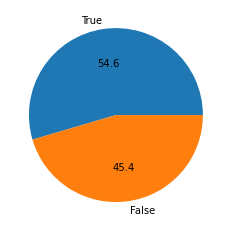

else statement
finally statement


In [27]:
piechart(df, "Pregnancies", 2)

In [42]:
Insulindf.shape

(138, 9)

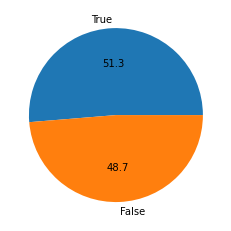

else statement
finally statement


In [41]:
piechart(df, "Insulin", 10)

In [43]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
x = df.drop("Outcome", axis=1)
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [46]:
y=df.Outcome

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# x_train으로 예측 모델을 만들고 test로 검증

In [50]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [51]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


In [52]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [53]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [54]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [57]:
clf = LogisticRegression(solver='liblinear', random_state=0)

In [61]:
clf.fit(x_train, y_train) #train데이터 셋으로 학습

LogisticRegression(random_state=0, solver='liblinear')

In [63]:
y_pred = clf.predict(x_test)

In [64]:
clf.score(x_test, y_test)

0.8181818181818182

In [65]:
confusion_matrix(y_test, y_pred)

array([[98,  9],
       [19, 28]])

## 조건부 확률


| | 당뇨O로 진료  | 당뇨X로 진료    |   |
|---:|:-------------|:-----------|:------|
| 실제 당뇨 O| 98  | 9       | 107   |
| 실제 당뇨 X | 19  | 28    | 47   | O     |


- 실제 당뇨이나 당뇨x로 진료+당뇨x이나 당뇨o로 진료 ->오진 확률
- 실제 당뇨이고 당뇨로 진료 + 실제 당뇨x 이고 당뇨 x -> 진료의 정확성 위 clf.score(x_test, y_pred)의미


In [84]:
from xgboost import XGBClassifier
XGBModel = XGBClassifier()
XGBModel.fit(x_train, y_train)

/Users/yjjo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:08:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)

In [87]:
rf_clf.score(x_test, y_test)

0.8116883116883117

In [88]:
confusion_matrix(y_test, y_pred)

array([[93, 14],
       [15, 32]])